# Solution to problem 1



# Solution to Problem 2

We have $Y_1,Y_2,..Y_n | \mu \sim N(\mu,1)$ , $\mu \sim t_v $ and $v \sim Truncated Gamma(a,b,(2,\infty))$. So, the posterior distribution $\pi$ is given by,

$$\pi((\mu,v)|Y_1,...,Y_n) \propto f(Y_1,...,Y_n | (\mu,v))f(\mu | v)f(v)$$
$$ \propto v^{a-1}e^{-bv}\Big(1+\frac{\mu^2}{v}\Big)^{\frac{-(v+1)}{2}}I(2\leq v){\prod_{i=1}^{n} e^{\frac{-(y_i-\mu)^2}{2}}}$$
We will call this scaled expression of $\pi$ as $\pi'$.

Now the following is the MH algorithm to sample from $\pi'$ : 
1. Choose $y_1$ from $N(3,1)$. For any iterate $t$, do the following:
2. Draw $x^*$ from $N(y_{t},0.2)$.
3. Calculate $\alpha = min(1,\frac{\pi'(x^*)}{\pi'(y_t)})$.
4. Draw $U \sim U(0,1)$. if $U< \alpha $, set $y_{t+1}=x^*$.
6. Else set $y_{t+1}=y_t$.

I was only able to attempt this problem properly due to lack of understanding of the concepts. I will try my best to solve other problems after some more reading even if this submission is rejected.

In [36]:
using Distributions
using StatsPlots
using Plots
using Statistics
using SpecialFunctions
using StatsBase

In [52]:
function scaledPosterior(a,b,u,v,Y)
    if(u<2)
        return 0
    end
    x = (1+(u^2)/v)^((-(v+1))/2)*v^(a-1)*exp(-(b*v))
    for i in 1:100
        x = x*exp((-((Y[i]-u)^2))/2)
    end
    return x
end

scaledPosterior (generic function with 1 method)

In [53]:
function MH(a,b,u,v,Y,last)
    alpha = scaledPosterior(a,b,u,v,Y)/scaledPosterior(a,b,last,v,Y)
    U = rand(Uniform(0,1))
    if(U<alpha)
        return v
    end
    return last
end

MH (generic function with 1 method)

In [59]:
no_of_samples = 10000
a = 2
b = 0.1
u = 5
v = 8

8

In [60]:
X = zeros(no_of_samples,1)
Y = zeros(100,1)
for i in 1:100
    Y[i] = rand(Normal(u,1))
end
X[1] = Y[1]
for i in 2:no_of_samples
    u = rand(Normal(X[i-1],0.2))
    X[i] = MH(a,b,u,v,Y,X[i-1])
end

In [62]:
print("Mean of samples is: ")
println(mean(X))
print("Mean of Y is: ")
println(mean(Y))

Mean of samples is: 7.999749246367665
Mean of Y is: 5.119650947018738


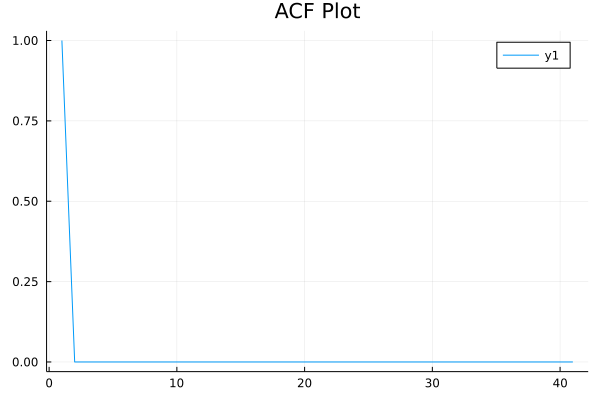

In [63]:
plot(autocor(X),title = "ACF Plot")

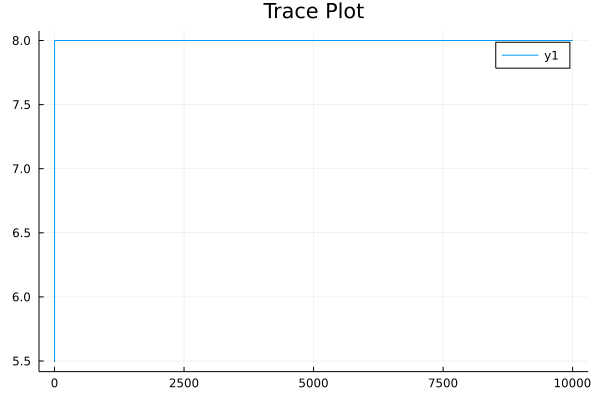

In [64]:
plot((X), title="Trace Plot")